In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Default.csv', index_col=0)

In [3]:
df

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
...,...,...,...,...
9996,No,No,711.555020,52992.378914
9997,No,No,757.962918,19660.721768
9998,No,No,845.411989,58636.156984
9999,No,No,1569.009053,36669.112365


In [4]:
df.iloc[:,1:]

,student,balance,income
1,No,729.526495,44361.625074
2,Yes,817.180407,12106.134700
3,No,1073.549164,31767.138947
4,No,529.250605,35704.493935
5,No,785.655883,38463.495879
...,...,...,...
9996,No,711.555020,52992.378914
9997,No,757.962918,19660.721768
9998,No,845.411989,58636.156984
9999,No,1569.009053,36669.112365


In [5]:
df.student = df.student.map(dict(Yes=1, No=0))

In [6]:
#df[df.default.isna()]
df

,default,student,balance,income
1,No,0,729.526495,44361.625074
2,No,1,817.180407,12106.134700
3,No,0,1073.549164,31767.138947
4,No,0,529.250605,35704.493935
5,No,0,785.655883,38463.495879
...,...,...,...,...
9996,No,0,711.555020,52992.378914
9997,No,0,757.962918,19660.721768
9998,No,0,845.411989,58636.156984
9999,No,0,1569.009053,36669.112365


In [ ]:
# Convert default to binary encoding
df['default_binary'] = df['default'].map({'Yes': 1, 'No': 0})

# Create train-test split
X = df[['student', 'balance', 'income']]
y = df['default_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Class distribution in training set:\n{y_train.value_counts()}")
print(f"Class distribution in test set:\n{y_test.value_counts()}")

In [8]:
len(X_train)

8000

In [9]:
len(X_test)

2000

# Credit Default Analysis with Threshold Optimization

This notebook demonstrates how **probability thresholds** affect the performance of a logistic regression model for credit default prediction.

## Key Concepts:
- **Threshold**: The probability cutoff used to convert predicted probabilities to binary predictions
- **Default threshold**: 0.5 (but this may not be optimal!)
- **Trade-offs**: Lower thresholds catch more defaults but create more false alarms

## Analysis Structure:
1. **Data Exploration**: Understanding the credit default dataset
2. **Model Training**: Logistic regression on customer features
3. **Threshold Analysis**: Testing multiple probability thresholds (0.1 to 0.9)
4. **Performance Visualization**: Seeing how metrics change with threshold
5. **Business Impact**: Understanding costs and benefits of different thresholds

---

## Explore Your Data

<Axes: xlabel='income', ylabel='Count'>

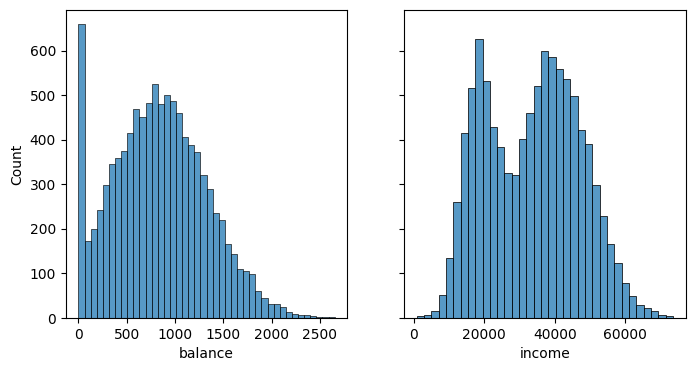

In [10]:
f, ax = plt.subplots(1, 2, figsize = (8,4), sharey= True)
sns.histplot(df.balance,ax = ax[0])
sns.histplot(df.income, ax= ax[1])

<Axes: xlabel='student', ylabel='balance'>

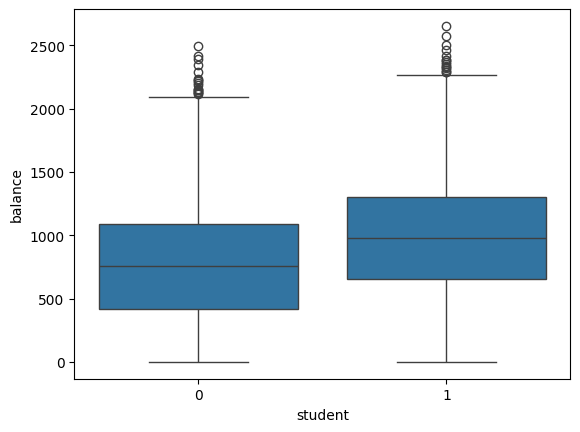

In [21]:
sns.boxplot(x=df.student, y=df.balance)

<Axes: xlabel='default', ylabel='income'>

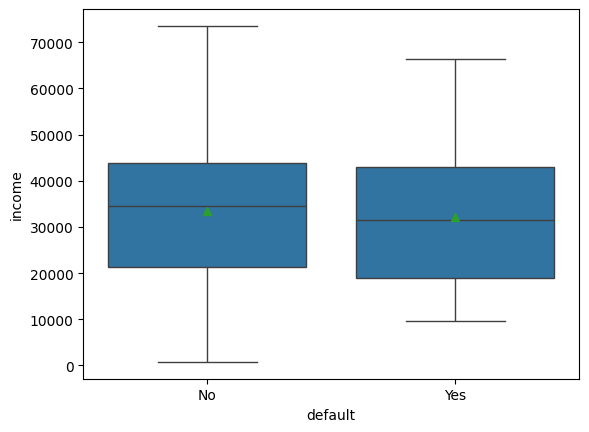

In [19]:
sns.boxplot(x=df.default, y=df.income, showmeans=True)

<Axes: xlabel='balance', ylabel='default'>

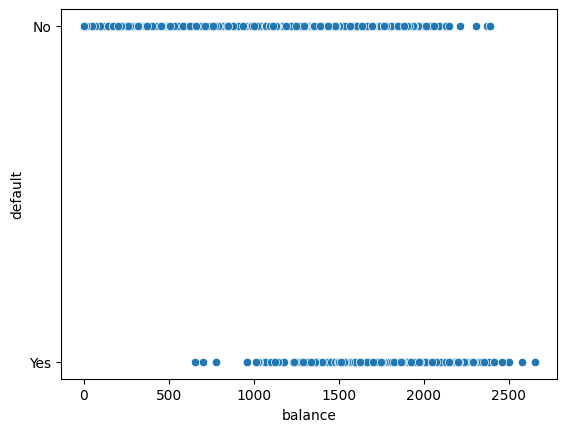

In [13]:
sns.scatterplot(x = df.balance, y = df.default )

<Axes: xlabel='balance', ylabel='income'>

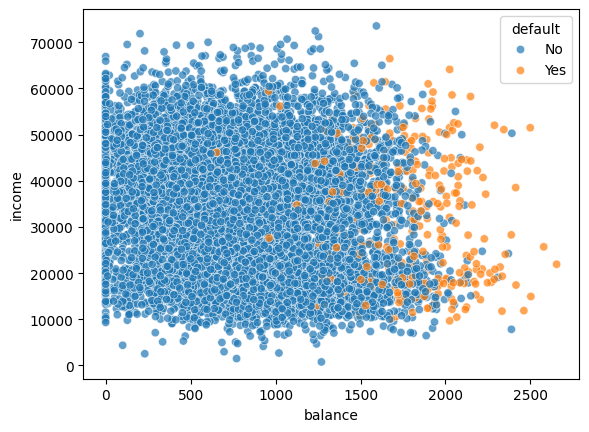

In [14]:
sns.scatterplot(x = df.balance, y = df.income, hue = df.default,alpha = .7 )

In [ ]:
# Train Logistic Regression model
logistic = LogisticRegression(random_state=42, max_iter=1000)
logistic.fit(X_train, y_train)

# Get predicted probabilities
y_prob = logistic.predict_proba(X_test)[:, 1]

print("Logistic Regression Model Trained Successfully!")
print(f"Model coefficients: {logistic.coef_[0]}")
print(f"Model intercept: {logistic.intercept_[0]}")
print(f"Feature names: {X_train.columns.tolist()}")

,balance,income
2695,1804.036475,31318.296026
5141,1174.194909,35533.484519
2569,978.652180,25742.119731
3672,548.136289,19501.341068
7428,270.072593,36833.645138
...,...,...
2896,1270.092810,16809.006452
7814,1598.020831,39163.361056
906,1234.476479,31313.374575
5193,0.000000,29322.631394


In [ ]:
# Comprehensive Threshold Analysis
def evaluate_threshold(y_true, y_prob, threshold):
    """Evaluate model performance at a given threshold"""
    y_pred = (y_prob >= threshold).astype(int)
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    
    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    return {
        'threshold': threshold,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'tp': tp,
        'fp': fp,
        'tn': tn,
        'fn': fn,
        'specificity': tn / (tn + fp) if (tn + fp) > 0 else 0
    }

# Test multiple thresholds
thresholds = np.arange(0.1, 1.0, 0.05)
results = [evaluate_threshold(y_test, y_prob, t) for t in thresholds]

# Convert to DataFrame for easy analysis
threshold_df = pd.DataFrame(results)
print("Threshold Analysis Complete!")
print(f"Tested {len(thresholds)} different thresholds from {thresholds[0]:.2f} to {thresholds[-1]:.2f}")
threshold_df.head()

[[1932    9]
 [  43   16]]


In [ ]:
# Visualize Performance Metrics vs Threshold
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Main performance metrics
axes[0, 0].plot(threshold_df['threshold'], threshold_df['accuracy'], 'o-', label='Accuracy', linewidth=2)
axes[0, 0].plot(threshold_df['threshold'], threshold_df['precision'], 's-', label='Precision', linewidth=2)
axes[0, 0].plot(threshold_df['threshold'], threshold_df['recall'], '^-', label='Recall', linewidth=2)
axes[0, 0].plot(threshold_df['threshold'], threshold_df['f1'], 'd-', label='F1-Score', linewidth=2)
axes[0, 0].set_xlabel('Probability Threshold')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_title('Performance Metrics vs Probability Threshold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Precision vs Recall trade-off
axes[0, 1].plot(threshold_df['recall'], threshold_df['precision'], 'o-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Recall (Sensitivity)')
axes[0, 1].set_ylabel('Precision')
axes[0, 1].set_title('Precision-Recall Trade-off')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Sensitivity vs Specificity
axes[1, 0].plot(threshold_df['threshold'], threshold_df['recall'], 'o-', label='Sensitivity (Recall)', linewidth=2)
axes[1, 0].plot(threshold_df['threshold'], threshold_df['specificity'], 's-', label='Specificity', linewidth=2)
axes[1, 0].set_xlabel('Probability Threshold')
axes[1, 0].set_ylabel('Rate')
axes[1, 0].set_title('Sensitivity vs Specificity')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: ROC Curve
fpr, tpr, roc_thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
axes[1, 1].plot(fpr, tpr, linewidth=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
axes[1, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('ROC Curve')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

LinearDiscriminantAnalysis()

In [ ]:
# Compare Performance at Key Thresholds
key_thresholds = [0.3, 0.5, 0.7]

print("="*80)
print("DETAILED COMPARISON OF KEY THRESHOLDS")
print("="*80)

for threshold in key_thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    
    print(f"\n📊 THRESHOLD = {threshold}")
    print("-" * 40)
    
    # Basic metrics
    accuracy = accuracy_score(y_test, y_pred_thresh)
    precision = precision_score(y_test, y_pred_thresh, zero_division=0)
    recall = recall_score(y_test, y_pred_thresh, zero_division=0)
    f1 = f1_score(y_test, y_pred_thresh, zero_division=0)
    
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\nConfusion Matrix:")
    print(f"True Negatives:  {tn:4d} | False Positives: {fp:4d}")
    print(f"False Negatives: {fn:4d} | True Positives:  {tp:4d}")
    
    # Business interpretation
    total_predictions = len(y_test)
    print(f"\nBusiness Impact:")
    print(f"• Out of {total_predictions} customers:")
    print(f"  - Correctly identified non-defaulters: {tn} ({tn/total_predictions*100:.1f}%)")
    print(f"  - Correctly identified defaulters: {tp} ({tp/total_predictions*100:.1f}%)")
    print(f"  - Missed defaulters (false negatives): {fn} ({fn/total_predictions*100:.1f}%)")
    print(f"  - False alarms (false positives): {fp} ({fp/total_predictions*100:.1f}%)")

print("\n" + "="*80)

QuadraticDiscriminantAnalysis()

In [ ]:
# Find Optimal Thresholds Based on Different Criteria
print("🎯 OPTIMAL THRESHOLD ANALYSIS")
print("="*60)

# Find optimal thresholds for different objectives
optimal_accuracy = threshold_df.loc[threshold_df['accuracy'].idxmax()]
optimal_f1 = threshold_df.loc[threshold_df['f1'].idxmax()]
optimal_precision = threshold_df.loc[threshold_df['precision'].idxmax()]
optimal_recall = threshold_df.loc[threshold_df['recall'].idxmax()]

# Youden's J statistic (sensitivity + specificity - 1)
threshold_df['youden_j'] = threshold_df['recall'] + threshold_df['specificity'] - 1
optimal_youden = threshold_df.loc[threshold_df['youden_j'].idxmax()]

print(f"🎯 Best Accuracy:  Threshold = {optimal_accuracy['threshold']:.3f}, Accuracy = {optimal_accuracy['accuracy']:.4f}")
print(f"🎯 Best F1-Score:  Threshold = {optimal_f1['threshold']:.3f}, F1 = {optimal_f1['f1']:.4f}")
print(f"🎯 Best Precision: Threshold = {optimal_precision['threshold']:.3f}, Precision = {optimal_precision['precision']:.4f}")
print(f"🎯 Best Recall:    Threshold = {optimal_recall['threshold']:.3f}, Recall = {optimal_recall['recall']:.4f}")
print(f"🎯 Best Balance:   Threshold = {optimal_youden['threshold']:.3f}, Youden's J = {optimal_youden['youden_j']:.4f}")

print(f"\n📈 THRESHOLD RECOMMENDATIONS:")
print(f"• Conservative (minimize false alarms): Use threshold = {optimal_precision['threshold']:.3f}")
print(f"• Aggressive (catch all defaults): Use threshold = {optimal_recall['threshold']:.3f}")
print(f"• Balanced approach: Use threshold = {optimal_f1['threshold']:.3f}")
print(f"• Default sklearn threshold: 0.500")

<bound method LinearDiscriminantAnalysis.decision_function of LinearDiscriminantAnalysis()>

In [ ]:
# Summary Table of Key Thresholds
summary_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
summary_data = []

for t in summary_thresholds:
    if t in threshold_df['threshold'].values:
        row = threshold_df[threshold_df['threshold'] == t].iloc[0]
        summary_data.append({
            'Threshold': f"{t:.1f}",
            'Accuracy': f"{row['accuracy']:.3f}",
            'Precision': f"{row['precision']:.3f}",
            'Recall': f"{row['recall']:.3f}",
            'F1-Score': f"{row['f1']:.3f}",
            'Specificity': f"{row['specificity']:.3f}",
            'TP': int(row['tp']),
            'FP': int(row['fp']),
            'TN': int(row['tn']),
            'FN': int(row['fn'])
        })

summary_df = pd.DataFrame(summary_data)

print("📋 PERFORMANCE SUMMARY TABLE")
print("="*100)
print(summary_df.to_string(index=False))

print(f"\n💡 KEY INSIGHTS:")
print(f"• Lower thresholds (0.1-0.3): High recall but many false positives")
print(f"• Higher thresholds (0.7-0.9): High precision but miss many true positives") 
print(f"• Middle thresholds (0.4-0.6): Balance between precision and recall")
print(f"• The default 0.5 threshold may not always be optimal for your use case")

# Show the effect of extreme thresholds
print(f"\n⚠️  EXTREME CASES:")
low_thresh = summary_df.iloc[0]  # 0.1 threshold
high_thresh = summary_df.iloc[-1]  # 0.9 threshold
print(f"• At threshold 0.1: Catches {low_thresh['TP']} defaults but {low_thresh['FP']} false alarms")
print(f"• At threshold 0.9: Only {high_thresh['FP']} false alarms but misses {high_thresh['FN']} defaults")

Accuracy of logistic regression classifier on test set: 0.97


In [ ]:
# Business Implications of Different Thresholds
print("💼 BUSINESS IMPLICATIONS OF THRESHOLD SELECTION")
print("="*70)

# Define business costs (hypothetical)
cost_false_positive = 100  # Cost of incorrectly flagging a good customer
cost_false_negative = 1000  # Cost of missing a defaulter

print(f"📊 Assuming business costs:")
print(f"• Cost of False Positive (flagging good customer): ${cost_false_positive}")
print(f"• Cost of False Negative (missing defaulter): ${cost_false_negative}")

print(f"\n💰 COST ANALYSIS FOR KEY THRESHOLDS:")

for threshold in [0.3, 0.5, 0.7]:
    row = threshold_df[abs(threshold_df['threshold'] - threshold) < 0.01].iloc[0]
    
    total_cost = (row['fp'] * cost_false_positive + 
                  row['fn'] * cost_false_negative)
    
    print(f"\nThreshold {threshold:.1f}:")
    print(f"  • False Positives: {int(row['fp'])} × ${cost_false_positive} = ${int(row['fp']) * cost_false_positive:,}")
    print(f"  • False Negatives: {int(row['fn'])} × ${cost_false_negative} = ${int(row['fn']) * cost_false_negative:,}")
    print(f"  • Total Cost: ${total_cost:,.0f}")

print(f"\n🎯 THRESHOLD SELECTION GUIDELINES:")
print(f"• If missing defaults is very costly → Use lower threshold (0.3)")
print(f"• If false alarms are costly → Use higher threshold (0.7)")
print(f"• For balanced approach → Use threshold optimized for F1-score ({optimal_f1['threshold']:.2f})")
print(f"• Always consider your specific business context and costs!")

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1941
         Yes       0.64      0.27      0.38        59

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



## Decision Boundary Visualization

The **decision boundary** is the threshold line/surface that separates the predicted classes. For logistic regression:
- In 1D: It's the point where P(default=1) = 0.5
- In 2D: It's the line where P(default=1) = 0.5  
- In higher dimensions: It's a hyperplane

Let's visualize how the logistic regression model makes decisions in different dimensional spaces.

In [ ]:
# 1D Decision Boundary: Logistic Regression with Balance only
print("🎯 1D DECISION BOUNDARY ANALYSIS")
print("="*50)

# Train a simple 1D logistic regression using only balance
X_balance = df[['balance']]
y_binary = df['default_binary']

# Split data for 1D model
X_balance_train, X_balance_test, y_balance_train, y_balance_test = train_test_split(
    X_balance, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Train 1D logistic regression
logistic_1d = LogisticRegression(random_state=42)
logistic_1d.fit(X_balance_train, y_balance_train)

print(f"1D Model Coefficient (Balance): {logistic_1d.coef_[0][0]:.6f}")
print(f"1D Model Intercept: {logistic_1d.intercept_[0]:.6f}")

# Calculate decision boundary (where probability = 0.5)
# 0.5 = 1 / (1 + exp(-(b0 + b1*x)))
# Solving: x = -b0/b1
decision_boundary_balance = -logistic_1d.intercept_[0] / logistic_1d.coef_[0][0]
print(f"Decision Boundary (Balance = $): {decision_boundary_balance:.2f}")

# Create range of balance values for smooth curve
balance_range = np.linspace(df['balance'].min(), df['balance'].max(), 300)
balance_range_reshaped = balance_range.reshape(-1, 1)

# Get predicted probabilities
prob_range = logistic_1d.predict_proba(balance_range_reshaped)[:, 1]

# Create the plot
plt.figure(figsize=(12, 8))

# Subplot 1: Sigmoid curve with decision boundary
plt.subplot(2, 1, 1)
plt.plot(balance_range, prob_range, 'b-', linewidth=3, label='Sigmoid Curve')
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold (0.5)')
plt.axvline(x=decision_boundary_balance, color='red', linestyle='--', linewidth=2, 
           label=f'Decision Boundary (Balance=${decision_boundary_balance:.0f})')

# Add some sample points
sample_indices = np.random.choice(len(df), 100, replace=False)
for idx in sample_indices:
    color = 'orange' if df.iloc[idx]['default'] == 'Yes' else 'lightblue'
    plt.scatter(df.iloc[idx]['balance'], df.iloc[idx]['default_binary'], 
               color=color, alpha=0.6, s=30)

plt.xlabel('Balance ($)', fontsize=12)
plt.ylabel('Predicted Probability of Default', fontsize=12)
plt.title('1D Decision Boundary: Balance vs Default Probability', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Histogram showing distribution around decision boundary
plt.subplot(2, 1, 2)
no_default = df[df['default'] == 'No']['balance']
default = df[df['default'] == 'Yes']['balance']

plt.hist(no_default, bins=50, alpha=0.7, label='No Default', color='lightblue', density=True)
plt.hist(default, bins=50, alpha=0.7, label='Default', color='orange', density=True)
plt.axvline(x=decision_boundary_balance, color='red', linestyle='--', linewidth=2, 
           label=f'Decision Boundary (${decision_boundary_balance:.0f})')

plt.xlabel('Balance ($)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Balance by Default Status', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 INTERPRETATION:")
print(f"• Customers with balance < ${decision_boundary_balance:.0f} are predicted as 'No Default'")
print(f"• Customers with balance > ${decision_boundary_balance:.0f} are predicted as 'Default'")
print(f"• The sigmoid curve shows how probability changes smoothly with balance")

In [ ]:
# 2D Decision Boundary: Balance vs Income
print("\n🎯 2D DECISION BOUNDARY ANALYSIS")
print("="*50)

# Train 2D logistic regression using balance and income
X_2d = df[['balance', 'income']]
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(
    X_2d, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

# Train 2D logistic regression
logistic_2d = LogisticRegression(random_state=42)
logistic_2d.fit(X_2d_train, y_2d_train)

print(f"2D Model Coefficients:")
print(f"  Balance: {logistic_2d.coef_[0][0]:.6f}")
print(f"  Income:  {logistic_2d.coef_[0][1]:.6f}")
print(f"  Intercept: {logistic_2d.intercept_[0]:.6f}")

# Create a mesh for decision boundary visualization
h = 500  # step size in the mesh
balance_min, balance_max = df['balance'].min() - 100, df['balance'].max() + 100
income_min, income_max = df['income'].min() - 1000, df['income'].max() + 1000

xx, yy = np.meshgrid(np.arange(balance_min, balance_max, h),
                     np.arange(income_min, income_max, h))

# Get probability predictions for each point in the mesh
mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = logistic_2d.predict_proba(mesh_points)[:, 1]
Z = Z.reshape(xx.shape)

# Create the 2D decision boundary plot
plt.figure(figsize=(15, 12))

# Main plot: Decision boundary with contours
plt.subplot(2, 2, 1)
# Plot decision boundary (probability = 0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='--', linewidths=3)
plt.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap='RdYlBu')

# Plot data points
no_default_data = df[df['default'] == 'No']
default_data = df[df['default'] == 'Yes']

plt.scatter(no_default_data['balance'], no_default_data['income'], 
           c='blue', marker='o', alpha=0.6, s=30, label='No Default')
plt.scatter(default_data['balance'], default_data['income'], 
           c='red', marker='s', alpha=0.8, s=30, label='Default')

plt.xlabel('Balance ($)', fontsize=12)
plt.ylabel('Income ($)', fontsize=12)
plt.title('2D Decision Boundary: Balance vs Income', fontsize=14, fontweight='bold')
plt.legend()
plt.colorbar(label='Probability of Default')

# Subplot 2: Probability contours only
plt.subplot(2, 2, 2)
contour_plot = plt.contour(xx, yy, Z, levels=[0.1, 0.3, 0.5, 0.7, 0.9], 
                          colors=['darkblue', 'blue', 'red', 'orange', 'darkred'], 
                          linewidths=2)
plt.clabel(contour_plot, inline=True, fontsize=10, fmt='%.1f')
plt.scatter(no_default_data['balance'], no_default_data['income'], 
           c='lightblue', alpha=0.5, s=20)
plt.scatter(default_data['balance'], default_data['income'], 
           c='lightcoral', alpha=0.7, s=20)
plt.xlabel('Balance ($)', fontsize=12)
plt.ylabel('Income ($)', fontsize=12)
plt.title('Probability Contours', fontsize=14, fontweight='bold')

# Subplot 3: 3D surface plot
ax = plt.subplot(2, 2, 3, projection='3d')
surf = ax.plot_surface(xx, yy, Z, cmap='RdYlBu', alpha=0.7)
ax.set_xlabel('Balance ($)')
ax.set_ylabel('Income ($)')
ax.set_zlabel('Probability of Default')
ax.set_title('3D Probability Surface', fontweight='bold')

# Subplot 4: Decision regions
plt.subplot(2, 2, 4)
# Create binary predictions
Z_binary = (Z >= 0.5).astype(int)
plt.contourf(xx, yy, Z_binary, levels=1, colors=['lightblue', 'lightcoral'], alpha=0.5)
plt.contour(xx, yy, Z, levels=[0.5], colors='red', linestyles='-', linewidths=3)

plt.scatter(no_default_data['balance'], no_default_data['income'], 
           c='blue', marker='o', alpha=0.6, s=30, label='No Default')
plt.scatter(default_data['balance'], default_data['income'], 
           c='red', marker='s', alpha=0.8, s=30, label='Default')

plt.xlabel('Balance ($)', fontsize=12)
plt.ylabel('Income ($)', fontsize=12)
plt.title('Decision Regions', fontsize=14, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

# Mathematical equation of the decision boundary
w0, w1, w2 = logistic_2d.intercept_[0], logistic_2d.coef_[0][0], logistic_2d.coef_[0][1]
print(f"\n📐 DECISION BOUNDARY EQUATION:")
print(f"The decision boundary occurs where: {w0:.3f} + {w1:.6f}×Balance + {w2:.6f}×Income = 0")
print(f"Rearranged: Income = {-w0/w2:.1f} + {-w1/w2:.6f}×Balance")
print(f"\n💡 INTERPRETATION:")
print(f"• Red dashed line separates predicted classes")
print(f"• Points above/right of line: Higher default probability") 
print(f"• Points below/left of line: Lower default probability")
print(f"• The boundary is linear (straight line) in 2D space")

In [ ]:
# Decision Boundaries with Different Thresholds
print("\n🎯 DECISION BOUNDARIES AT DIFFERENT THRESHOLDS")
print("="*60)

# Show how decision boundary changes with different probability thresholds
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
thresholds_to_show = [0.3, 0.5, 0.7, 0.9]

for i, threshold in enumerate(thresholds_to_show):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    
    # Plot background probability surface
    contour_bg = ax.contourf(xx, yy, Z, levels=50, alpha=0.3, cmap='RdYlBu')
    
    # Plot decision boundary at current threshold
    ax.contour(xx, yy, Z, levels=[threshold], colors='red', linestyles='-', linewidths=3)
    
    # Plot data points
    ax.scatter(no_default_data['balance'], no_default_data['income'], 
              c='blue', marker='o', alpha=0.6, s=25, label='No Default')
    ax.scatter(default_data['balance'], default_data['income'], 
              c='red', marker='s', alpha=0.8, s=25, label='Default')
    
    # Classification regions based on threshold
    Z_thresh = (Z >= threshold).astype(int)
    ax.contourf(xx, yy, Z_thresh, levels=1, colors=['lightblue', 'lightcoral'], alpha=0.2)
    
    ax.set_xlabel('Balance ($)')
    ax.set_ylabel('Income ($)')
    ax.set_title(f'Threshold = {threshold}', fontweight='bold')
    if i == 0:
        ax.legend()

plt.suptitle('How Decision Boundaries Change with Different Thresholds', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print(f"🔍 KEY OBSERVATIONS:")
print(f"• Lower thresholds (0.3): Decision boundary moves toward 'safer' region")
print(f"• Higher thresholds (0.9): Decision boundary moves toward 'riskier' region") 
print(f"• The boundary shape stays the same (linear) - only position changes")
print(f"• Changing threshold = changing the probability contour line we use for decisions")

In [ ]:
# Full 3-Feature Decision Boundary Analysis
print("\n🎯 3D DECISION BOUNDARY: ALL FEATURES")
print("="*50)

# Use the original 3-feature model we trained earlier
print(f"Full Model Coefficients:")
print(f"  Student:  {logistic.coef_[0][0]:.6f}")
print(f"  Balance:  {logistic.coef_[0][1]:.6f}") 
print(f"  Income:   {logistic.coef_[0][2]:.6f}")
print(f"  Intercept: {logistic.intercept_[0]:.6f}")

# Show decision boundary for students vs non-students separately
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for student_status in [0, 1]:
    ax = axes[student_status]
    
    # Create mesh for this student status
    mesh_student = np.full(xx.ravel().shape, student_status)
    mesh_3d = np.column_stack([mesh_student, xx.ravel(), yy.ravel()])
    
    # Get probability predictions
    Z_3d = logistic.predict_proba(mesh_3d)[:, 1].reshape(xx.shape)
    
    # Plot probability surface
    contour = ax.contourf(xx, yy, Z_3d, levels=50, alpha=0.3, cmap='RdYlBu')
    
    # Plot decision boundary (0.5 threshold)
    ax.contour(xx, yy, Z_3d, levels=[0.5], colors='red', linestyles='-', linewidths=3)
    
    # Plot data points for this student status
    student_filter = (df['student'] == student_status)
    no_default_student = df[student_filter & (df['default'] == 'No')]
    default_student = df[student_filter & (df['default'] == 'Yes')]
    
    ax.scatter(no_default_student['balance'], no_default_student['income'], 
              c='blue', marker='o', alpha=0.7, s=40, label='No Default')
    ax.scatter(default_student['balance'], default_student['income'], 
              c='red', marker='s', alpha=0.9, s=40, label='Default')
    
    student_label = "Student" if student_status == 1 else "Non-Student"
    ax.set_xlabel('Balance ($)')
    ax.set_ylabel('Income ($)')
    ax.set_title(f'Decision Boundary: {student_label}', fontweight='bold')
    ax.legend()
    
    # Add colorbar for first plot
    if student_status == 0:
        cbar = plt.colorbar(contour, ax=ax)
        cbar.set_label('Probability of Default')

plt.tight_layout()
plt.show()

# Calculate some example predictions to show the effect
examples = [
    {'student': 0, 'balance': 1000, 'income': 40000, 'description': 'Non-student, low balance, average income'},
    {'student': 1, 'balance': 1000, 'income': 40000, 'description': 'Student, low balance, average income'},
    {'student': 0, 'balance': 2000, 'income': 30000, 'description': 'Non-student, high balance, low income'},
    {'student': 1, 'balance': 2000, 'income': 30000, 'description': 'Student, high balance, low income'},
]

print(f"\n📊 EXAMPLE PREDICTIONS:")
print("-" * 80)
for ex in examples:
    X_example = np.array([[ex['student'], ex['balance'], ex['income']]])
    prob = logistic.predict_proba(X_example)[0, 1]
    prediction = "Default" if prob >= 0.5 else "No Default"
    
    print(f"• {ex['description']}")
    print(f"  Probability: {prob:.3f} → Prediction: {prediction}")
    print()

print(f"💡 KEY INSIGHTS:")
print(f"• Student status shifts the entire decision boundary")
print(f"• Students and non-students have different risk profiles at same balance/income")
print(f"• The model captures interactions between all three features")
print(f"• Decision boundary is still linear but exists in 3D space")

In [ ]:
# Summary: Decision Boundary Comparison
print("📋 DECISION BOUNDARY SUMMARY")
print("="*60)

# Create a comparison table
boundary_summary = {
    'Dimension': ['1D (Balance only)', '2D (Balance + Income)', '3D (All features)'],
    'Decision Boundary': [
        f'Balance = ${decision_boundary_balance:.0f}',
        f'Income = {-w0/w2:.1f} + {-w1/w2:.6f}×Balance',
        'Linear hyperplane in 3D space'
    ],
    'Interpretation': [
        'Single cutoff point',
        'Straight line in 2D',
        'Plane in 3D (shown as separate 2D slices)'
    ],
    'Complexity': ['Simplest', 'Moderate', 'Most complex'],
    'Flexibility': ['Limited', 'Better', 'Best']
}

summary_df = pd.DataFrame(boundary_summary)
print(summary_df.to_string(index=False))

print(f"\n🎓 MATHEMATICAL CONCEPTS:")
print(f"• Logistic regression always creates LINEAR decision boundaries")
print(f"• In 1D: boundary is a point")
print(f"• In 2D: boundary is a straight line") 
print(f"• In 3D: boundary is a flat plane")
print(f"• In higher dimensions: boundary is a hyperplane")

print(f"\n🔧 PRACTICAL IMPLICATIONS:")
print(f"• Linear boundaries work well when classes are linearly separable")
print(f"• If data has complex, non-linear patterns, consider:")
print(f"  - Polynomial features")
print(f"  - Non-linear algorithms (SVM with RBF, Random Forest, Neural Networks)")
print(f"  - Feature engineering to capture non-linear relationships")

print(f"\n⚙️ MODEL EQUATION SUMMARY:")
print(f"P(default=1) = 1 / (1 + exp(-(β₀ + β₁×student + β₂×balance + β₃×income)))")
print(f"Where:")
print(f"  β₀ = {logistic.intercept_[0]:.4f} (intercept)")
print(f"  β₁ = {logistic.coef_[0][0]:.4f} (student coefficient)")
print(f"  β₂ = {logistic.coef_[0][1]:.6f} (balance coefficient)")
print(f"  β₃ = {logistic.coef_[0][2]:.6f} (income coefficient)")

In [38]:
y_pred = lda.predict(X_test.iloc[:,1:])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lda.score(X_test.iloc[:,1:], y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
logistic.coef_

In [ ]:
logistic.intercept_

In [ ]:
sns.scatterplot(x = df.balance, y = df.income, hue = df.default,alpha = .7 )

In [ ]:
logistic.predict_proba(X_test)

In [ ]:
y_test.unique()